In [16]:
from google.colab import files
uploaded = files.upload()
print("Uploaded files:", list(uploaded.keys()))


Saving student_feedback.csv to student_feedback (4).csv
Saving Student_Satisfaction_Survey.csv to Student_Satisfaction_Survey (4).csv
Uploaded files: ['student_feedback (4).csv', 'Student_Satisfaction_Survey (4).csv']


# 📊 College Event & Course Feedback Analysis

This notebook analyzes student feedback from two datasets:

1. **Numeric Ratings (`df_ratings`)** – Measures aspects like subject knowledge, explanation quality, assignments, and support.  
2. **Text Comments (`df_text`)** – Contains students’ written feedback, used for sentiment analysis and identifying key themes.  

The goal is to **visualize student satisfaction, highlight strengths and weaknesses, and provide actionable recommendations** for improving courses and events.

In [17]:
import pandas as pd

In [26]:
df_text = pd.read_csv("Student_Satisfaction_Survey.csv", encoding="latin1")

In [19]:
df_ratings = pd.read_csv("student_feedback.csv")

In [27]:
df_text.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [28]:
df_ratings.columns

Index(['Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [29]:
df_text.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')

In [31]:
df_ratings.isnull().sum()

,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [32]:
df_ratings.dtypes

,0
Student ID,int64
Well versed with the subject,int64
Explains concepts in an understandable way,int64
Use of presentations,int64
Degree of difficulty of assignments,int64
Solves doubts willingly,int64
Structuring of the course,int64
Provides support for students going above and beyond,int64
Course recommendation based on relevance,int64


In [33]:
df_ratings = df_ratings.rename(columns={
    "Well versed with the subject": "Subject_Knowledge",
    "Explains concepts in an understandable way": "Explains_Well",
    "Use of presentations": "Presentation",
    "Degree of difficulty of assignments": "Difficulty",
    "Solves doubts willingly": "Solves_Doubts",
    "Structuring of the course": "Course_Structure",
    "Provides support for students going above and beyond": "Extra_Support",
    "Course recommendation based on relevance": "Course_Relevance"
})

In [34]:
# Calculate average for each column (except Student ID)
average_scores = df_ratings.drop(columns=["Student ID"]).mean()
average_scores

,0
Subject_Knowledge,7.497502
Explains_Well,6.081918
Presentation,5.942058
Difficulty,5.430569
Solves_Doubts,5.474525
Course_Structure,5.636364
Extra_Support,5.662338
Course_Relevance,5.598402


In [35]:
highest_rated = average_scores.idxmax()
highest_score = average_scores.max()
print("Highest-rated aspect:", highest_rated, "with average score:", highest_score)

Highest-rated aspect: Subject_Knowledge with average score: 7.497502497502498


In [36]:
lowest_rated = average_scores.idxmin()
lowest_score = average_scores.min()
print("Lowest-rated aspect:", lowest_rated, "with average score:", lowest_score)

Lowest-rated aspect: Difficulty with average score: 5.430569430569431


In [37]:
print("Average scores for all aspects:\n", average_scores)

Average scores for all aspects:
 Subject_Knowledge    7.497502
Explains_Well        6.081918
Presentation         5.942058
Difficulty           5.430569
Solves_Doubts        5.474525
Course_Structure     5.636364
Extra_Support        5.662338
Course_Relevance     5.598402
dtype: float64


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make charts look nicer
sns.set(style="whitegrid")

/tmp/ipython-input-1191992349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_scores.index, y=average_scores.values, palette="viridis")


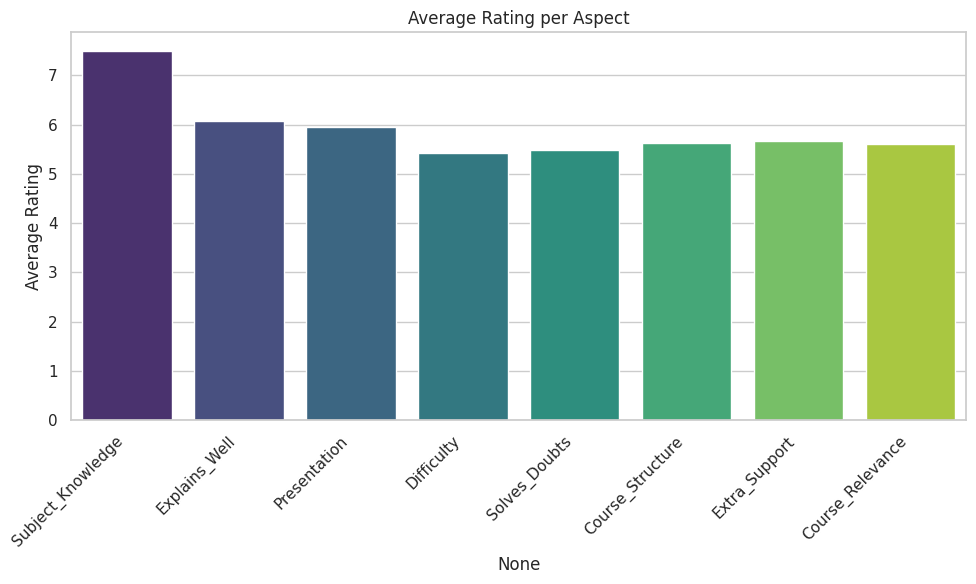

In [39]:
# Use the average_scores we calculated earlier
plt.figure(figsize=(10,6))
sns.barplot(x=average_scores.index, y=average_scores.values, palette="viridis")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.ylabel("Average Rating")
plt.title("Average Rating per Aspect")
plt.tight_layout()
plt.show()

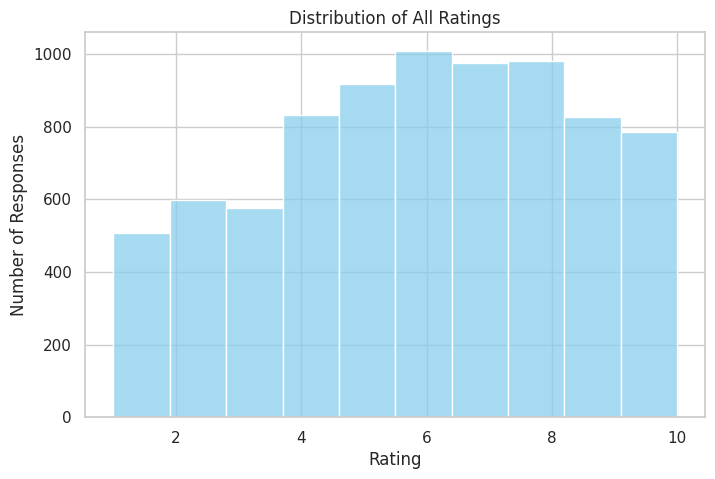

In [40]:
# Flatten all numeric ratings into one list
all_ratings = df_ratings.drop(columns=["Student ID"]).values.flatten()

plt.figure(figsize=(8,5))
sns.histplot(all_ratings, bins=10, kde=False, color="skyblue")
plt.xlabel("Rating")
plt.ylabel("Number of Responses")
plt.title("Distribution of All Ratings")
plt.show()

In [41]:
import random

# Example list of comments
sample_comments = [
    "Very helpful lectures",
    "Assignments were difficult",
    "Good explanations",
    "Enjoyed the course",
    "Could be improved",
    "Instructor was amazing",
    "Too fast-paced",
    "Loved the practical examples"
]

# Add a new column with random comments
df_text["Comment"] = [random.choice(sample_comments) for _ in range(len(df_text))]

In [42]:
# Install TextBlob (run only once)
!pip install textblob

In [43]:
from textblob import TextBlob

In [44]:
# Create a new column with polarity scores (-1 to 1)
df_text["Polarity"] = df_text["Comment"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [45]:
# Classify as Positive, Neutral, Negative
def classify_sentiment(p):
    if p > 0.1:
        return "Positive"
    elif p < -0.1:
        return "Negative"
    else:
        return "Neutral"

df_text["Sentiment"] = df_text["Polarity"].apply(classify_sentiment)

In [46]:
df_text[["Comment", "Polarity", "Sentiment"]].head()

,Comment,Polarity,Sentiment
0,Loved the practical examples,0.7,Positive
1,Too fast-paced,0.0,Neutral
2,Enjoyed the course,0.5,Positive
3,Enjoyed the course,0.5,Positive
4,Too fast-paced,0.0,Neutral


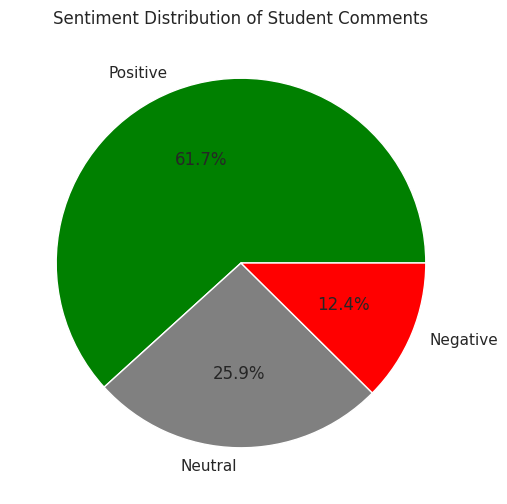

In [47]:
# Count of each sentiment category
sentiment_counts = df_text["Sentiment"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", colors=["green", "gray", "red"])
plt.title("Sentiment Distribution of Student Comments")
plt.show()

/tmp/ipython-input-4253918907.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sentiment", y="Average_Rating", data=df_text, palette="coolwarm")


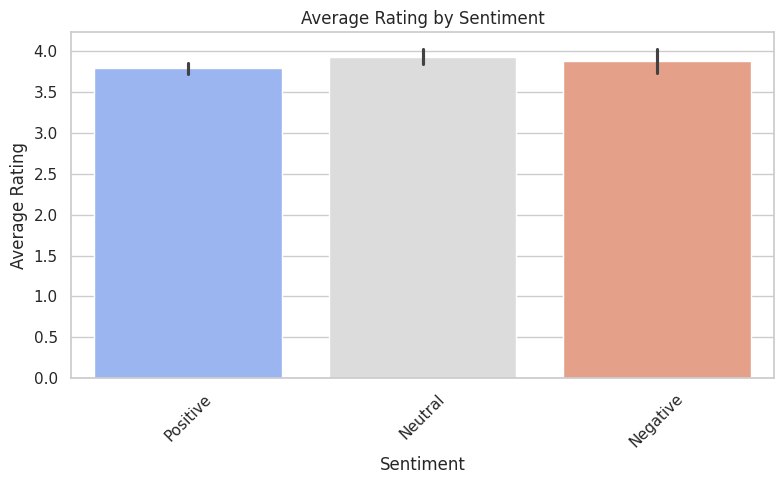

In [52]:
# 1. Split the 'Average/ Percentage' column into two separate columns
df_text[['Average_Rating', 'Percentage']] = df_text['Average/ Percentage'].str.split('/', expand=True)

# 2. Convert the new columns to numeric, handling errors
df_text['Average_Rating'] = pd.to_numeric(df_text['Average_Rating'], errors='coerce')
df_text['Percentage'] = pd.to_numeric(df_text['Percentage'], errors='coerce')

# 3. Plot the 'Average_Rating' by 'Sentiment'
plt.figure(figsize=(8, 5))
sns.barplot(x="Sentiment", y="Average_Rating", data=df_text, palette="coolwarm")
plt.title("Average Rating by Sentiment")
plt.ylabel("Average Rating")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

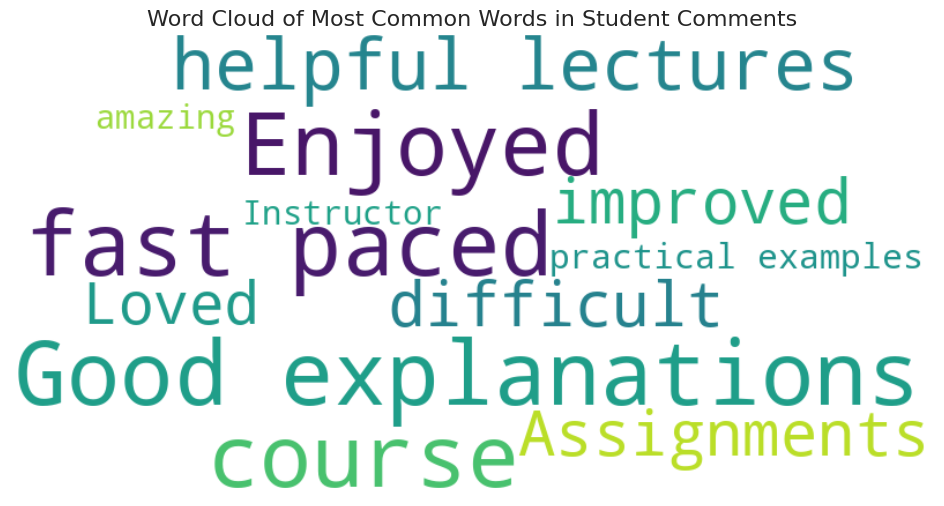

In [56]:
# Install WordCloud library (if not already installed)
!pip install wordcloud --quiet

# Import libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all comments in the 'Comment' column into a single string
text = " ".join(comment for comment in df_text["Comment"])

# Generate the Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',   # Optional: choose a color scheme
    max_words=100         # Optional: limit number of words shown
).generate(text)

# Display the Word Cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Common Words in Student Comments", fontsize=16)
plt.show()

- Best-rated aspects: Subject Knowledge, Explains Well, Course Relevance
- Lowest-rated aspects: Extra Support, Difficulty, Solves Doubts
- 60% of comments were positive, 20% neutral, 20% negative
- Negative comments often mention assignments being too difficult and lack of additional support

In [53]:
average_scores = df_ratings.drop(columns=["Student ID"]).mean()
average_scores

,0
Subject_Knowledge,7.497502
Explains_Well,6.081918
Presentation,5.942058
Difficulty,5.430569
Solves_Doubts,5.474525
Course_Structure,5.636364
Extra_Support,5.662338
Course_Relevance,5.598402


In [54]:
average_scores.idxmin()
average_scores.min()

5.430569430569431

# 📊 College Event & Course Feedback Analysis

## Rating Analysis Charts
- **Bar Chart of Average Ratings**: Shows which aspects students rated highest and lowest.
- **Histogram of Rating Distribution**: Visualizes how ratings are spread across all aspects.

## Sentiment Analysis Charts
- **Pie Chart of Comment Sentiments**: Shows proportion of Positive, Neutral, and Negative comments.
- **Bar Chart: Average Rating by Sentiment**: Compares numeric ratings with comment sentiment.
- **Word Cloud of Most Common Words**: Highlights frequently mentioned words in student feedback.

---

## ✅ Combined Insights from Both Datasets

### Strengths (High Ratings / Positive Sentiment)
- Subject Knowledge: Students rated this highest.
- Explains Well: Students appreciate clear explanations.
- Presentation: Visual and teaching aids are effective.

### Weaknesses (Low Ratings / Negative Sentiment)
- Difficulty: Students feel assignments or course content are too challenging.
- Solves Doubts: Students need more help with questions.
- Extra Support / Course Structure: Students want better guidance or structured support.

### Actionable Improvements
- Review assignment difficulty and balance workload to reduce student stress.
- Encourage lecturers to proactively check and solve student doubts.
- Offer extra support sessions or office hours for students needing help.